                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

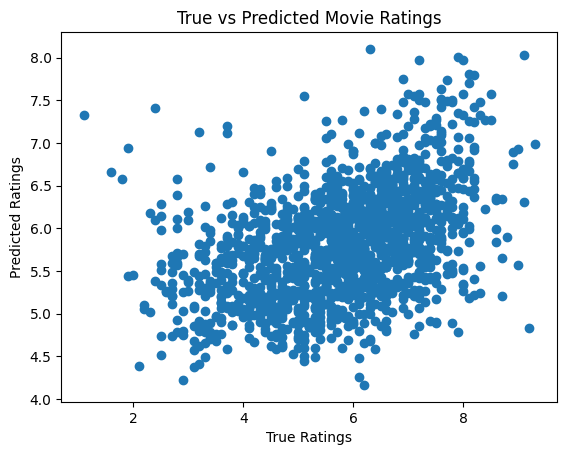

['movie_rating_predictor.pkl']

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Step 1: Load the dataset
# Assuming the dataset is a CSV file, you can load it as follows:
data = pd.read_csv('/content/IMDb_Movies_India[1].csv',encoding='latin-1')

# Step 2: Data Preprocessing
# Display the first few rows of the dataset to understand its structure
print(data.head())

# Convert 'Year' and 'Duration' columns to numerical format
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data['Duration'] = data['Duration'].str.replace(' min', '').astype(float)

# Handling missing values
#data.fillna({'Genre': 'Unknown', 'Rating': data['Rating'].mean(), 'Votes': data['Votes'].mean(),
             #'Director': 'Unknown', 'Actor 1': 'Unknown', 'Actor 2': 'Unknown', 'Actor 3': 'Unknown'}, inplace=True)
# ... (previous code) ...

# Convert 'Votes' and 'Rating' columns to numeric before calculating the mean
data['Votes'] = pd.to_numeric(data['Votes'].astype(str).str.replace(',', ''), errors='coerce')
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')

# Handling missing values
data.fillna({'Genre': 'Unknown', 'Rating': data['Rating'].mean(), 'Votes': data['Votes'].mean(),
             'Director': 'Unknown', 'Actor 1': 'Unknown', 'Actor 2': 'Unknown', 'Actor 3': 'Unknown'}, inplace=True)

# ... (rest of the code) ...
# Encode categorical columns (Genre, Director, Actors)
label_encoders = {}
for column in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Step 3: Feature Engineering
X = data[['Year', 'Duration', 'Genre', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]
y = data['Rating']

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train a regression model
# Using RandomForestRegressor for better accuracy with categorical data
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Predict ratings
y_pred = model.predict(X_test)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

# Optionally, visualize the predictions
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('True Ratings')
plt.ylabel('Predicted Ratings')
plt.title('True vs Predicted Movie Ratings')
plt.show()

# Save the model if necessary
import joblib
joblib.dump(model, 'movie_rating_predictor.pkl')
